Data successfully loaded!

Age Group Distribution:

Age Group
18 - 24    472
25 - 34    382
35 - 44    101
45+         25
Name: count, dtype: int64

Percentage Breakdown of Age Groups:

Age Group
18 - 24    48.16%
25 - 34    38.98%
35 - 44    10.31%
45+         2.55%
Name: count, dtype: object


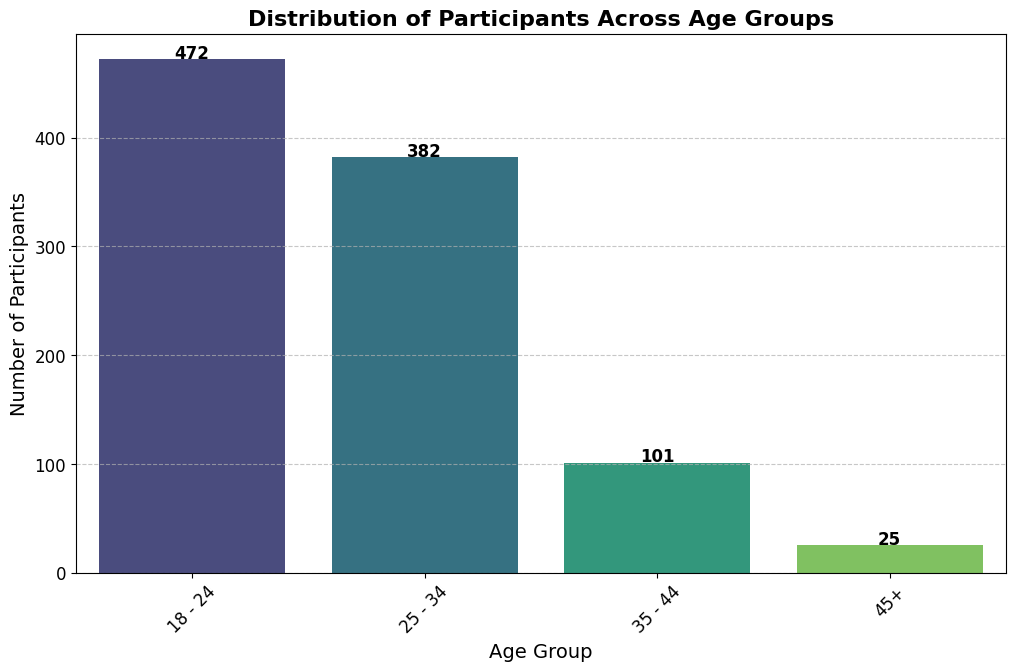

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "UMERA BOOST 2.0 & 3.0.xlsx"
sheet_name = "UMéRA 3.0"

try:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    print("Data successfully loaded!")
except Exception as e:
    print(f"Error loading file: {e}")
    exit()

# Clean column names to remove hidden characters and whitespace
df.columns = df.columns.str.strip().str.replace(r'\u2060', '', regex=True)

# Define the age group column
age_group_column = 'Age Group'

# Check if the age group column exists in the dataset
if age_group_column not in df.columns:
    print(f"Column '{age_group_column}' not found in dataset.")
    exit()

# Handling missing values in Age Group
df[age_group_column] = df[age_group_column].fillna("Unknown")

# Count the number of participants in each age group
age_group_distribution = df[age_group_column].value_counts().sort_index()

# Display numerical distribution
print("\nAge Group Distribution:\n")
print(age_group_distribution)

# Percentage breakdown
age_group_percentage = (age_group_distribution / age_group_distribution.sum()) * 100
print("\nPercentage Breakdown of Age Groups:\n")
print(age_group_percentage.round(2).astype(str) + '%')

# Visualization
plt.figure(figsize=(12, 7))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values, palette='viridis', hue=age_group_distribution.index, legend=False)

# Add data labels to the bars
for index, value in enumerate(age_group_distribution.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=12, fontweight='bold')

plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Participants", fontsize=14)
plt.title("Distribution of Participants Across Age Groups", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()